In [3]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy import stats
# import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
# pd.options.mode.chained_assignment = None
# warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# Kaggle's Bike Sharing Demand 

## Overview

## Introduction

### Original Features
* datetime - hourly date + timestamp  
* season - 
* * 1 = spring
* * 2 = summer
* * 3 = fall 
* * 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
* * 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
* * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
* * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
* * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

## Basic Analysis
* histogram the data
* create feature correlation heatmap
* add time features (year,year-month,month,week_number,day_of_week,day,hour)
* use log transformer 
* test increase demand year-over-year, month-over-month,

## Feature Ingeneering
* use desicision tree to convert hours into bins
* use desicision tree to convert temps into bins
* create dummy variables
* seperate data to casual and registered



Sources:
* https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/
* https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
* https://www.kaggle.com/miteshyadav/comprehensive-eda-with-xgboost-top-10-percentile

# Basic visualizations

In [4]:
ods_bike = pd.read_csv('C:\\Users\\Roy\\Dropbox\\GitHub\\Final Project\\source_files\\train.csv')
ods_bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
ods_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


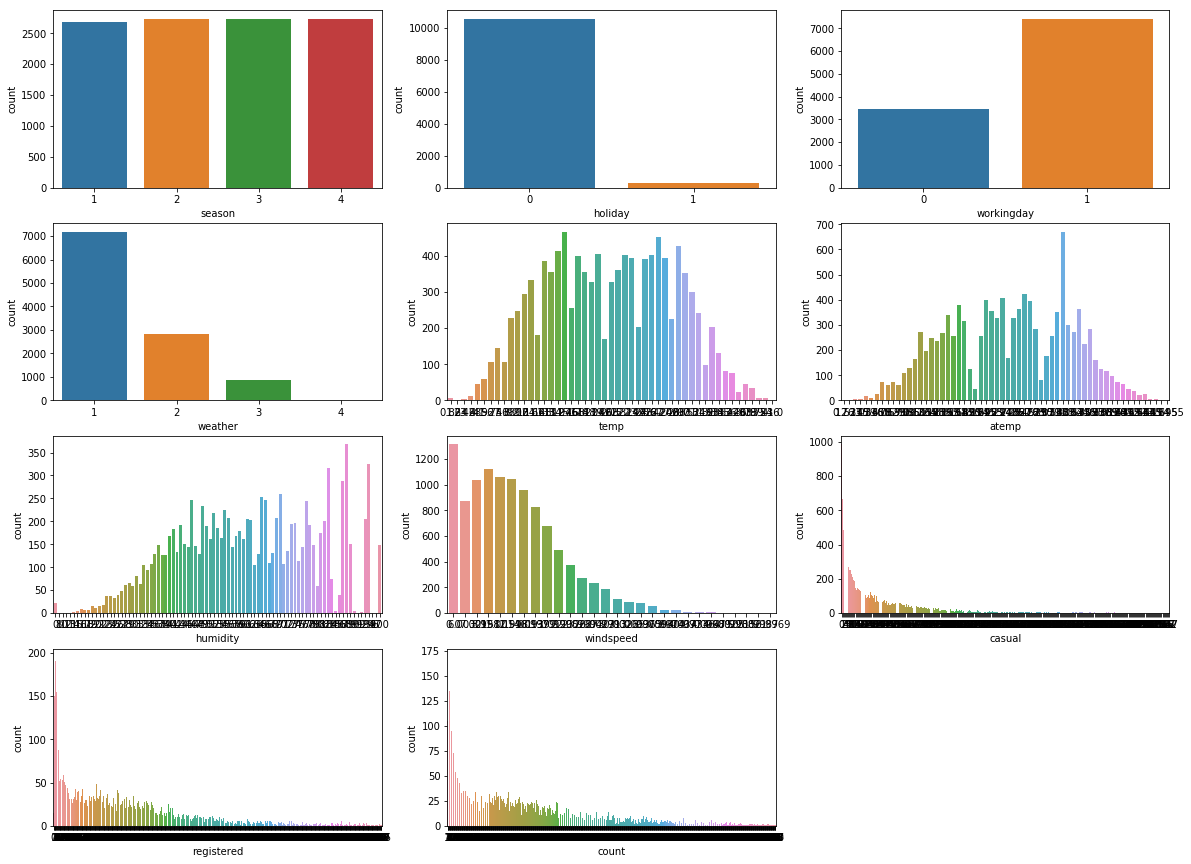

In [8]:
ods_bike_columns = ['season', 'holiday', 'workingday', 'weather', 'temp',
                    'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.subplots(figsize=(20,15))
for x in range(len(ods_bike_columns)):
    plt.subplot(4,3,x+1)
    sns.countplot(ods_bike_columns[x],data=ods_bike) 

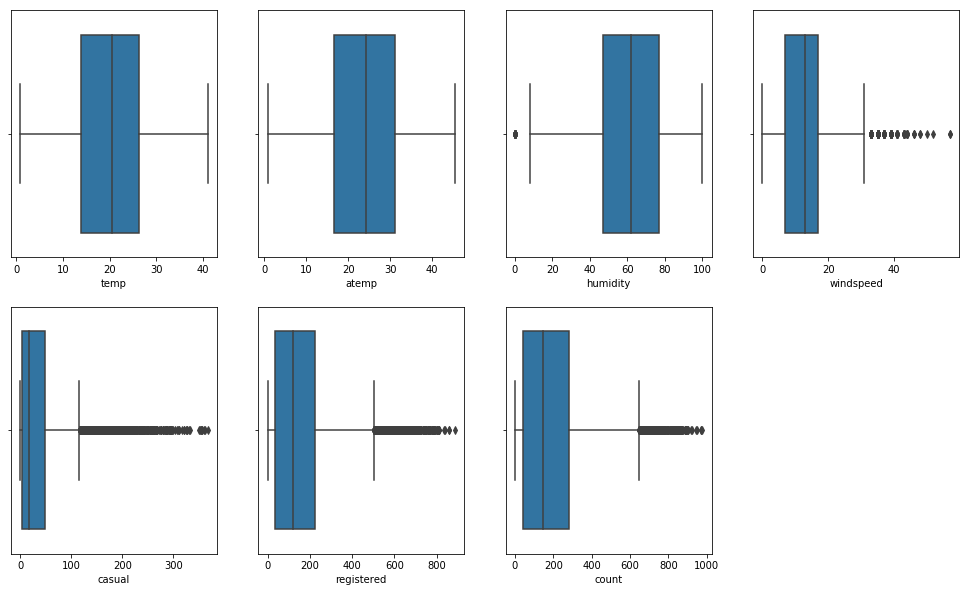

In [9]:
ods_bike_columns = ['temp','atemp', 'humidity', 'windspeed','casual', 'registered', 'count']

plt.subplots(figsize=(17,10))
for x in range(len(ods_bike_columns)):
    plt.subplot(2,4,x+1)
    sns.boxplot(ods_bike_columns[x],data=ods_bike) 

## Connection between variables and Count/Registered/Casual

### Template for stacked bar plot

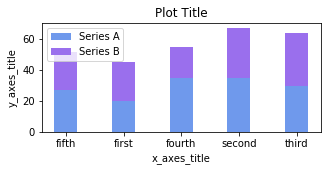

In [10]:
series_a = (20, 35, 30, 35, 27)
series_b = (25, 32, 34, 20, 25)
x_titles = ['first','second','third','fourth','fifth']
y_titles = ['Series A','Series B']

plt.subplots(figsize=(5,2))
p1 = plt.bar(x_titles, series_a, width = 0.4, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.4, color='#9A6FED',
             bottom=series_a)

plt.ylabel('y_axes_title')
plt.xlabel('x_axes_title')
plt.title('Plot Title')

plt.legend((p1[0], p2[0]), y_titles)

plt.show()

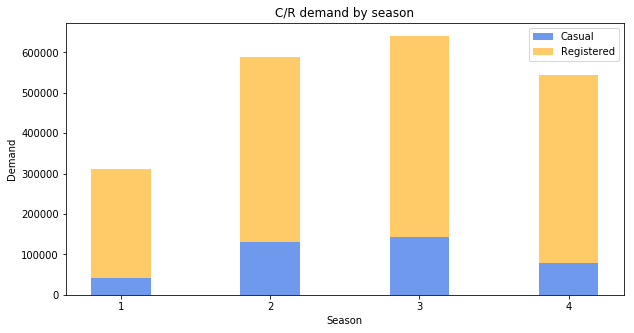

In [11]:
series_a = ods_bike.groupby('season')['casual'].sum().tolist()
series_b = ods_bike.groupby('season')['registered'].sum().tolist()
x_titles = ['1','2','3','4']
y_titles = ['Casual','Registered']

plt.subplots(figsize=(10,5))
p1 = plt.bar(x_titles, series_a, width = 0.4, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.4, color='#FFCB69',
             bottom=series_a)

plt.ylabel('Demand')
plt.xlabel('Season')
plt.title('C/R demand by season')

plt.legend((p1[0], p2[0]), y_titles)

plt.show()

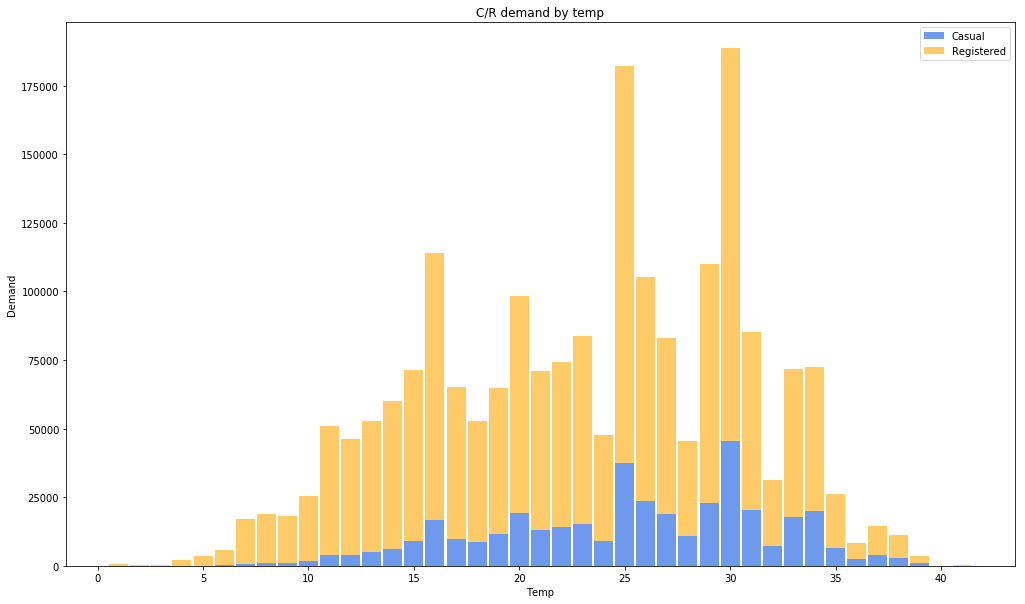

In [12]:
ods_bike['round_temp'] = ods_bike['temp'].apply(round)

series_a = ods_bike.groupby('round_temp')['casual'].sum().tolist()
series_b = ods_bike.groupby('round_temp')['registered'].sum().tolist()
x_titles = ods_bike.groupby('round_temp')['casual'].sum().index.tolist()
y_titles = ['Casual','Registered']

plt.subplots(figsize=(17,10))
p1 = plt.bar(x_titles, series_a, width = 0.9, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.9, color='#FFCB69',bottom=series_a)

plt.ylabel('Demand')
plt.xlabel('Temp')
plt.title('C/R demand by temp')

plt.legend((p1[0], p2[0]), y_titles)

plt.show()

In [83]:
ods_bike['datetime'][5].time().hour

# ods_bike['datetime'].apply(lambda x: x.date().year)

5

In [82]:
# ods_bike['datetime'] = ods_bike['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


TypeError: strptime() argument 1 must be str, not Timestamp

In [84]:
ods_bike['year'] = ods_bike['datetime'].apply(lambda x: x.date().year)
ods_bike['month'] = ods_bike['datetime'].apply(lambda x: str(x.date().month).zfill(2))
ods_bike['year_month'] = ods_bike['year'].map(str)+'-' + ods_bike['month'].map(str)
ods_bike['weekday'] = ods_bike['datetime'].apply(lambda x: x.date().weekday())
ods_bike['day'] = ods_bike['datetime'].apply(lambda x: str(x.date().day).zfill(2))
ods_bike['hour'] = ods_bike['datetime'].apply(lambda x: x.time().hour)

ods_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,round_temp,year,month,day,hour,year_month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,10,2011,01,01,0,2011-01,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,9,2011,01,01,1,2011-01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,9,2011,01,01,2,2011-01,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,10,2011,01,01,3,2011-01,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,10,2011,01,01,4,2011-01,5


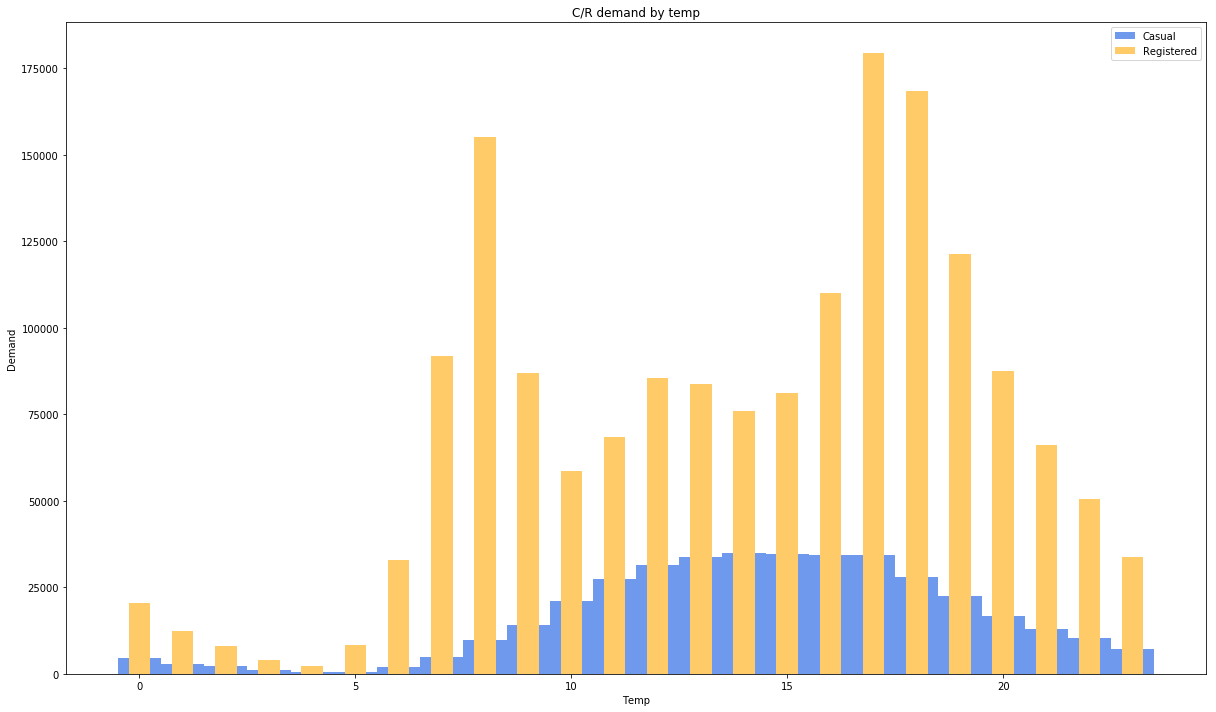

In [92]:
series_a = ods_bike.groupby('hour')['casual'].sum().tolist()
series_b = ods_bike.groupby('hour')['registered'].sum().tolist()
x_titles = ods_bike.groupby('hour')['casual'].sum().index.tolist()
y_titles = ['Casual','Registered']

plt.subplots(figsize=(17,10))
p1 = plt.bar(x_titles, series_a, width = 1, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.5, color='#FFCB69')

plt.ylabel('Demand')
plt.xlabel('Temp')
plt.title('C/R demand by temp')

plt.legend((p1[0], p2[0]), y_titles)

plt.tight_layout()
plt.show()